In [2]:
%cd drive/MyDrive/Colab\ Notebooks/PRML

/content/drive/MyDrive/Colab Notebooks/PRML


In [ ]:
from sympy import *
from sympy.stats import Normal, sample
from sympy.plotting import plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
init_printing()

In [ ]:
x = symbols('x')

In [ ]:
class f_regular(Function):

  @classmethod
  def eval(cls, x):
    return sin(2 * pi * x)

In [ ]:
f_regular(x)

In [ ]:
class f_generator(Function):

  @classmethod
  def eval(cls, x):
    return f_regular(x) + Normal('random_noise', 0, 0.25)

In [ ]:
f_generator(x)

In [ ]:
N = 10

In [ ]:
x_vector = Matrix(np.linspace(0, 1, N))
x_vector

⎡       0.0       ⎤
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.222222222222222⎥
⎢                 ⎥
⎢0.333333333333333⎥
⎢                 ⎥
⎢0.444444444444444⎥
⎢                 ⎥
⎢0.555555555555556⎥
⎢                 ⎥
⎢0.666666666666667⎥
⎢                 ⎥
⎢0.777777777777778⎥
⎢                 ⎥
⎢0.888888888888889⎥
⎢                 ⎥
⎣       1.0       ⎦

In [ ]:
t_vector = x_vector.applyfunc(lambda x_i: next(sample(f_generator(x_i))))
t_vector

/usr/local/lib/python3.7/dist-packages/sympy/stats/rv.py:1104: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))
/usr/local/lib/python3.7/dist-packages/sympy/stats/rv.py:1104: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))


⎡0.209465972370319 ⎤
⎢                  ⎥
⎢0.579674622081651 ⎥
⎢                  ⎥
⎢ 1.18796398937319 ⎥
⎢                  ⎥
⎢ 1.14982706651429 ⎥
⎢                  ⎥
⎢0.285560123022705 ⎥
⎢                  ⎥
⎢-0.128451179252827⎥
⎢                  ⎥
⎢ -1.1114076378396 ⎥
⎢                  ⎥
⎢-1.03743231987111 ⎥
⎢                  ⎥
⎢-0.361545785415424⎥
⎢                  ⎥
⎣-0.522598778122455⎦

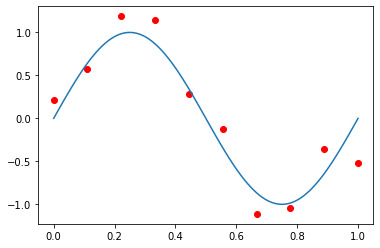

In [ ]:
xs = np.linspace(0, 1, 100)
plt.plot(xs, list(map(f_regular, xs)))
plt.scatter(x_vector, t_vector, c='red', marker='o')

In [ ]:
class y_predict(Function):

  @classmethod
  def eval(cls, x, w):
    M = w.shape[0]
    X = Matrix([[x_i ** i for i in range(M)] for x_i in x])
    return (X * w)

In [ ]:
w_0, w_1, w_2, w_3 = symbols('w_0 w_1 w_2 w_3')
w_vector = Matrix([w_0, w_1, w_2, w_3])
y_predict(x_vector, w_vector)

⎡                                    w₀                                    ⎤
⎢                                                                          ⎥
⎢w₀ + 0.111111111111111⋅w₁ + 0.0123456790123457⋅w₂ + 0.00137174211248285⋅w₃⎥
⎢                                                                          ⎥
⎢w₀ + 0.222222222222222⋅w₁ + 0.0493827160493827⋅w₂ + 0.0109739368998628⋅w₃ ⎥
⎢                                                                          ⎥
⎢ w₀ + 0.333333333333333⋅w₁ + 0.111111111111111⋅w₂ + 0.037037037037037⋅w₃  ⎥
⎢                                                                          ⎥
⎢ w₀ + 0.444444444444444⋅w₁ + 0.197530864197531⋅w₂ + 0.0877914951989026⋅w₃ ⎥
⎢                                                                          ⎥
⎢ w₀ + 0.555555555555556⋅w₁ + 0.308641975308642⋅w₂ + 0.171467764060357⋅w₃  ⎥
⎢                                                                          ⎥
⎢ w₀ + 0.666666666666667⋅w₁ + 0.444444444444444⋅w₂ + 0.296296296296296⋅w₃  ⎥

In [ ]:
class SSE(Function):

  @classmethod
  def eval(cls, w, x, t):
    diff = y_predict(x, w) - t
    return 0.5 * (diff.T * diff)[0]

In [ ]:
SSE(w_vector, x_vector, t_vector)

In [ ]:
deriv = Derivative(SSE(w_vector, x_vector, t_vector), w_vector)
deriv

  ∂  ⎛                            2                                           
─────⎝0.5⋅(w₀ - 0.209465972370319)  + 0.705629220023726⋅(0.841776357655115⋅w₀ 
 ⎡w₀⎤                                                                         
 ⎢  ⎥                                                                         
 ⎢w₁⎥                                                                         
∂⎢  ⎥                                                                         
 ⎢w₂⎥                                                                         
 ⎢  ⎥                                                                         
 ⎣w₃⎦                                                                         

                                                                           2  
+ 0.187061412812248⋅w₁ + 0.0415692028471662⋅w₂ + 0.0092376006327036⋅w₃ - 1)  +
                                                                              
                                                   

In [ ]:
deriv.doit()

⎡            10.0⋅w₀ + 5.0⋅w₁ + 3.51851851851852⋅w₂ + 2.77777777777778⋅w₃ - 0.
⎢                                                                             
⎢      5.0⋅w₀ + 3.51851851851852⋅w₁ + 2.77777777777778⋅w₂ + 2.33699131229995⋅w
⎢                                                                             
⎢3.51851851851852⋅w₀ + 2.77777777777778⋅w₁ + 2.33699131229995⋅w₂ + 2.046181984
⎢                                                                             
⎣ 2.77777777777778⋅w₀ + 2.33699131229995⋅w₁ + 2.04618198445359⋅w₂ + 1.84104162

251056072860736            ⎤
                           ⎥
₃ + 1.62457321737369       ⎥
                           ⎥
45359⋅w₃ + 1.71946460821198⎥
                           ⎥
08008⋅w₃ + 1.5344871317878 ⎦

In [ ]:
eq = Eq(deriv.doit(), Matrix([0, 0, 0, 0]))
eq

⎡            10.0⋅w₀ + 5.0⋅w₁ + 3.51851851851852⋅w₂ + 2.77777777777778⋅w₃ - 0.
⎢                                                                             
⎢      5.0⋅w₀ + 3.51851851851852⋅w₁ + 2.77777777777778⋅w₂ + 2.33699131229995⋅w
⎢                                                                             
⎢3.51851851851852⋅w₀ + 2.77777777777778⋅w₁ + 2.33699131229995⋅w₂ + 2.046181984
⎢                                                                             
⎣ 2.77777777777778⋅w₀ + 2.33699131229995⋅w₁ + 2.04618198445359⋅w₂ + 1.84104162

251056072860736            ⎤   ⎡0⎤
                           ⎥   ⎢ ⎥
₃ + 1.62457321737369       ⎥   ⎢0⎥
                           ⎥ = ⎢ ⎥
45359⋅w₃ + 1.71946460821198⎥   ⎢0⎥
                           ⎥   ⎢ ⎥
08008⋅w₃ + 1.5344871317878 ⎦   ⎣0⎦

In [ ]:
solve(eq, w_vector)

In [ ]:
def get_w_star(M, x, t):
  w_symbol = MatrixSymbol('w_symbol', M + 1, 1)
  w_vector = Matrix(w_symbol)
  deriv = Derivative(SSE(w_vector, x, t), w_vector)
  eq = Eq(deriv.doit(), Matrix(np.zeros(M + 1)))
  solution = solve(eq, w_vector)
  w_star = Matrix([solution[w_symbol[i, 0]] for i in range(M + 1)])
  return w_star

In [ ]:
def plot_by_M(M, x, t):
  plt.scatter(x, t, c='red')
  xs = np.linspace(0, 1, 100)
  plt.plot(xs, list(map(f_regular, xs)))
  w_star = get_w_star(M, x, t)
  plt.plot(xs, y_predict(xs, w_star))

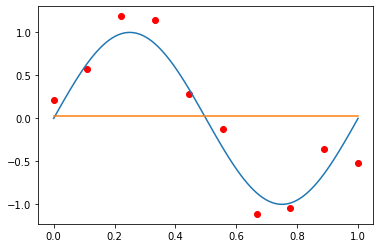

In [ ]:
plot_by_M(0, x_vector, t_vector)

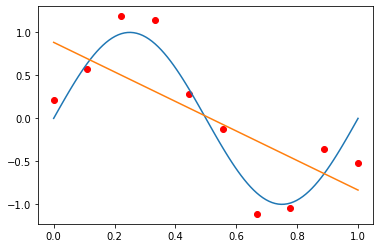

In [ ]:
plot_by_M(1, x_vector, t_vector)

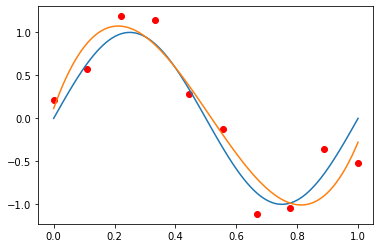

In [ ]:
plot_by_M(3, x_vector, t_vector)

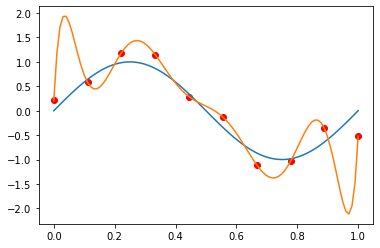

In [ ]:
plot_by_M(9, x_vector, t_vector)

In [ ]:
x_vector_100 = Matrix(np.linspace(0, 1, 100))
t_vector_100 = x_vector_100.applyfunc(lambda x_i: next(sample(f_generator(x_i))))

/usr/local/lib/python3.7/dist-packages/sympy/stats/rv.py:1104: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))


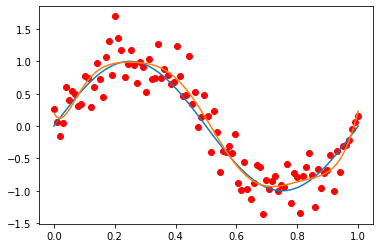

In [ ]:
plot_by_M(9, x_vector_100, t_vector_100)